In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

import matplotlib.patches as mpatches

In [ ]:
data=[]
data.append( pd.read_csv("20180307_JonasLehnenGuntherTuerk//I-V_curve.txt",delimiter="\t",skiprows=0 ))

for entry in data:
    I= entry.values[:,0]
    V= entry.values[:,1]
    dV=entry.values[:,2]
    stable= entry.values[:,3]
dI=[0.1 for x in range(len(I))]
    
fig, ax=plt.subplots(dpi=144)
for i in range(len(stable)):
    if stable[i]==1:
        ax.errorbar(I[i],V[i], yerr=dV[i], xerr=dI[i], color="r", linestyle="", linewidth=1)
    else:
        ax.errorbar(I[i],V[i], yerr=dV[i], xerr=dI[i], color="g", linestyle="", linewidth=2)
        
red   = mpatches.Patch(color='red',   label='Not stable burning plasma')
green = mpatches.Patch(color='green', label='Stable burning plasma')
plt.legend(handles=[red,green])

ax.set(xlabel="Current [mA]",ylabel="Voltage [V]",title="I-V Curve for Copper Traget")
fig.savefig("Plots/IVcurve.png")

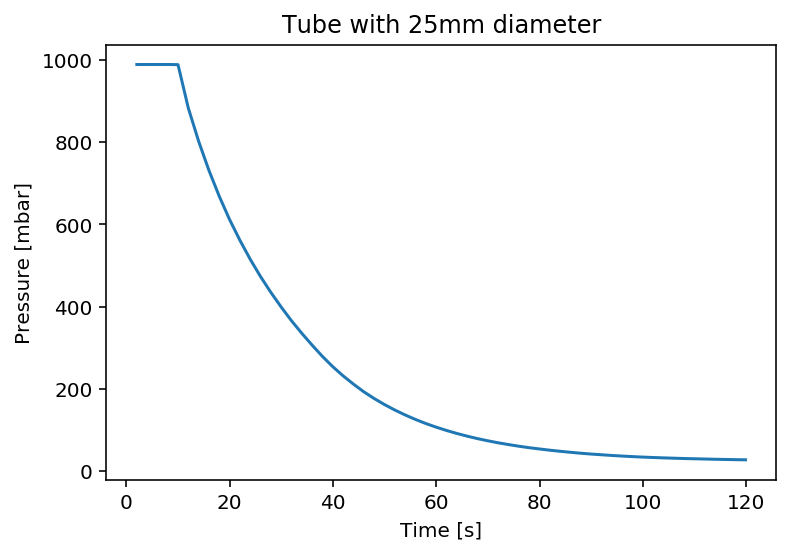

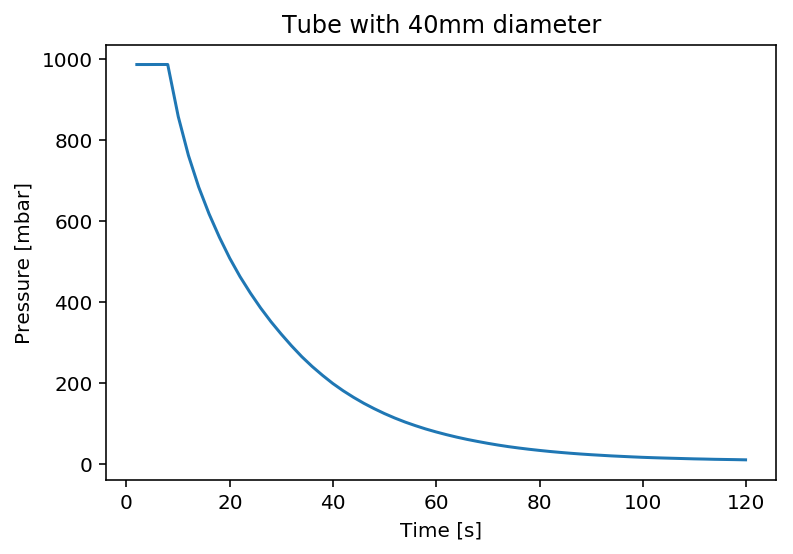

In [40]:
gamma=["25mm","40mm"]
for i in gamma:
    test="20180307_JonasLehnenGuntherTuerk/20180307_JonasGunther_{}".format(i)
    data=[]
    data.append( pd.read_csv(test,delimiter="\t" ))
    
    for entry in data:
        t= entry.values[:,0]
        p= entry.values[:,3]
       
    count=0
    for j in t: 
        if j<120.0:
            count=count+1
        else:
            break
    t=t[:count]
    p=p[:count]

    fig,ax=plt.subplots(dpi=144)
    ax.plot(t,p)
    ax.set(xlabel="Time [s]",ylabel="Pressure [mbar]", title="Tube with {} diameter".format(i))
    fig.savefig("Plots/{}.png".format(i))

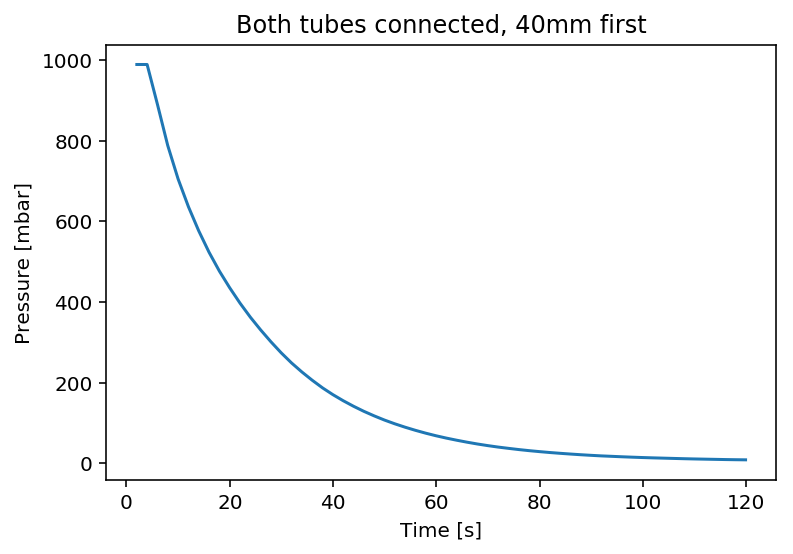

In [38]:
data=[]
data.append( pd.read_csv("20180307_JonasLehnenGuntherTuerk/20180307_JonasGunther_40mm25mm_40First",delimiter="\t",skiprows=11 ))

for entry in data:
    t= entry.values[:,0]
    p= entry.values[:,3]

fig,ax=plt.subplots(dpi=144)
ax.plot(t,p)
ax.set(xlabel="Time [s]",ylabel="Pressure [mbar]", title="Both tubes connected, 40mm first")
fig.savefig("Plots/BothTubes.png")